# EDA for the binary classification task

### Requirments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [2]:
METADATA_PATH = '../data/binaryData/'
LABEL_MULTI = ['No Defect', 'Defects']   

### Binary Dataset

In [3]:
df = pd.read_csv(METADATA_PATH+'binary_task_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]
imgs_with_one_defect = df.ImageId[df.ClassId == 1].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1]
	Number of examples:					12568
	Number of unique images:				12568

	Number of images with no defect:			5902 (46.96%)
	Number of images with one defect:			6666 (53.04%)


,ImageId,ClassId,EncodedPixels,Folder
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0
1,0007a71bf.jpg,1,18661 28 18863 82 19091 110 19347 110 19603 11...,0
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,0
3,000f6bf48.jpg,1,131973 1 132228 4 132483 6 132738 8 132993 11 ...,0
4,0014fce06.jpg,1,229501 11 229741 33 229981 55 230221 77 230468...,0


In [4]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Defects'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Defects'}
Class Distribution:		[5902, 6666]
Class Relative Distribution:	[0.47, 0.53]


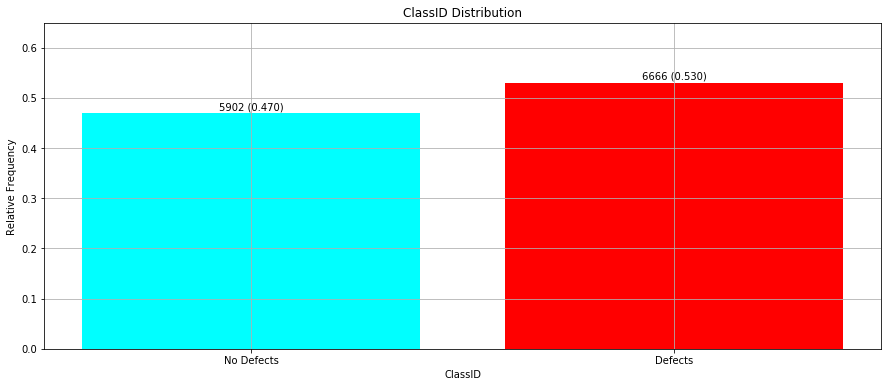

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['cyan', 'red'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Train Dataset

In [6]:
df = pd.read_csv(METADATA_PATH+'train_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]
imgs_with_one_defect = df.ImageId[df.ClassId == 1].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1]
	Number of examples:					7541
	Number of unique images:				7541

	Number of images with no defect:			3581 (47.49%)
	Number of images with one defect:			3960 (52.51%)


,ImageId,ClassId,EncodedPixels,Folder
0,d2e68511e.jpg,0,NaN,288
1,d8a2472a7.jpg,0,NaN,291
2,320557243.jpg,1,351536 6 351786 16 352022 41 352261 63 352516 ...,32
3,74b9e429d.jpg,0,NaN,235
4,6c1118c1b.jpg,1,65249 32 65442 95 65636 157 65829 220 66053 25...,69


In [7]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Defects'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Defects'}
Class Distribution:		[3581, 3960]
Class Relative Distribution:	[0.475, 0.525]


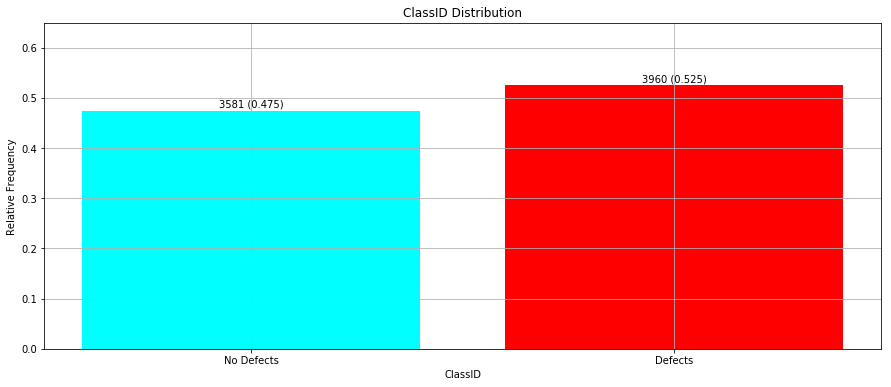

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['cyan', 'red'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Validation Dataset

In [9]:
df = pd.read_csv(METADATA_PATH+'val_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]
imgs_with_one_defect = df.ImageId[df.ClassId == 1].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1]
	Number of examples:					2514
	Number of unique images:				2514

	Number of images with no defect:			1134 (45.11%)
	Number of images with one defect:			1380 (54.89%)


,ImageId,ClassId,EncodedPixels,Folder
0,84d30fb77.jpg,1,102037 1 102166 3 102291 5 102416 9 102545 8 1...,86
1,64f5988c1.jpg,0,NaN,226
2,ac03c1990.jpg,0,NaN,266
3,2c2fa2f81.jpg,0,NaN,192
4,a70390e7a.jpg,0,NaN,263


In [10]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Defects'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Defects'}
Class Distribution:		[1134, 1380]
Class Relative Distribution:	[0.451, 0.549]


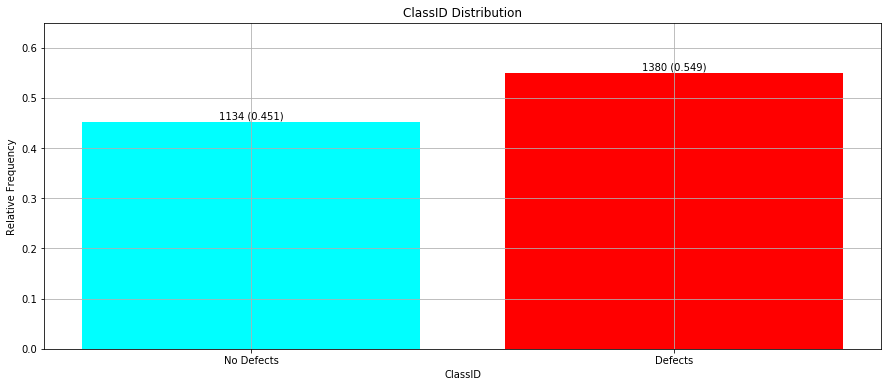

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['cyan', 'red'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Test set

In [12]:
df = pd.read_csv(METADATA_PATH+'test_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]
imgs_with_one_defect = df.ImageId[df.ClassId == 1].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1]
	Number of examples:					2513
	Number of unique images:				2513

	Number of images with no defect:			1187 (47.23%)
	Number of images with one defect:			1326 (52.77%)


,ImageId,ClassId,EncodedPixels,Folder
0,cc82046b0.jpg,0,NaN,284
1,1e7893a11.jpg,1,162188 1 162443 3 162698 4 162952 7 163207 8 1...,19
2,fe44d3c92.jpg,0,NaN,313
3,9a70057c0.jpg,1,172 6 253 4 297 3 427 17 501 12 547 9 683 27 7...,99
4,a9e7b571e.jpg,1,21382 3 21634 9 21886 15 22139 20 22391 26 226...,110


In [13]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Defects'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Defects'}
Class Distribution:		[1187, 1326]
Class Relative Distribution:	[0.472, 0.528]


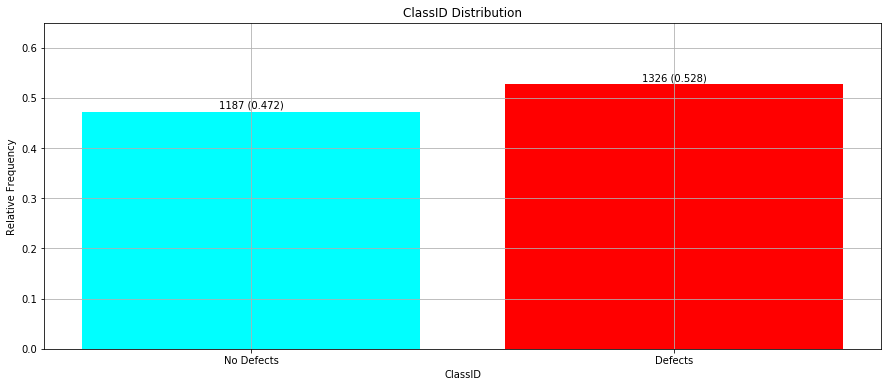

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['cyan', 'red'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()